# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist

- **Nama:** Eva Meivina Dwiana
- **Email:** evameivina@gmail.com
- **ID Dicoding:** evameivina - MC009D5X0328

## **Menentukan Pertanyaan Bisnis**

1.   Kategori produk apa yang memiliki jumlah penjualan terbanyak dan terendah?
2.   Metode pembayaran apa yang paling sering digunakan dan tidak digunakan oleh pelanggan?
3. Bagaimana distribusi rata-rata review score untuk setiap produk?



## Menyiapkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
import os

## Data Wrangling

#### Gathering Data

In [ ]:
products_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/mydataset/refs/heads/main/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/mydataset/refs/heads/main/olist_order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/mydataset/refs/heads/main/olist_order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_items_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/mydataset/refs/heads/main/olist_order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/mydataset/refs/heads/main/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/mydataset/refs/heads/main/olist_orders_dataset.csv")
customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### Assessing Data

##### Menilai Table products_df

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
print("Jumlah duplikasi: " , products_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
products_df.nunique()

,0
product_id,32951
product_category_name,73
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95


##### Menilai Table order_payments_df

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.nunique()

,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


In [ ]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Menilai Table order_reviews_df

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.nunique()

,0
review_id,98410
order_id,98673
review_score,5
review_comment_title,4527
review_comment_message,36159
review_creation_date,636
review_answer_timestamp,98248


In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Cleaning Data

##### **Membersihkan tabel products_df**

###### *Duplicate Data*

In [ ]:
products_df.duplicated().sum()

0

In [ ]:
products_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


##### *missing values*

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df.product_category_name.isna().sum()

610

In [ ]:
products_df.product_category_name.isna().mean() * 100

1.8512336499650999

In [ ]:
products_df.fillna(value="Prefer Not To Say", inplace=True)

<ipython-input-28-14dcebff0437>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Prefer Not To Say' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value="Prefer Not To Say", inplace=True)


In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


###### **Inaccurate Value**

In [ ]:
products_df.describe()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.0,32951,32951.0,32951.0,32951.0,32951.0,32951.0
unique,32951,74,67.0,2961,20.0,2205.0,100.0,103.0,96.0
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,60.0,Prefer Not To Say,1.0,200.0,16.0,10.0,11.0
freq,1,3029,2182.0,610,16489.0,2084.0,5520.0,2548.0,3718.0


In [ ]:
print(products_df[products_df['product_weight_g'] == 0])

                             product_id product_category_name  \
9769   81781c0fed9fe1ad6e8c81fca1e1cb08       cama_mesa_banho   
13683  8038040ee2a71048d4bdbbdc985b69ab       cama_mesa_banho   
14997  36ba42dd187055e1fbe943b2d11430ca       cama_mesa_banho   
32079  e673e90efa65a5409ff4196c038bb5af       cama_mesa_banho   

      product_name_lenght product_description_lenght product_photos_qty  \
9769                 51.0                      529.0                1.0   
13683                48.0                      528.0                1.0   
14997                53.0                      528.0                1.0   
32079                53.0                      528.0                1.0   

      product_weight_g product_length_cm product_height_cm product_width_cm  
9769               0.0              30.0              25.0             30.0  
13683              0.0              30.0              25.0             30.0  
14997              0.0              30.0              25.0      

In [ ]:
median_weight = products_df[products_df['product_category_name'] == 'cama_mesa_banho']['product_weight_g'].replace(0, np.nan).median()

products_df.loc[(products_df['product_category_name'] == 'cama_mesa_banho') & (products_df['product_weight_g'] == 0), 'product_weight_g'] = median_weight

<ipython-input-32-a4e49f05a357>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  median_weight = products_df[products_df['product_category_name'] == 'cama_mesa_banho']['product_weight_g'].replace(0, np.nan).median()


In [ ]:
# Cek apakah masih ada berat 0
print(products_df[products_df['product_weight_g'] == 0])

Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


In [ ]:
print(products_df.isna().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [ ]:
print(products_df.describe())

                              product_id product_category_name  \
count                              32951                 32951   
unique                             32951                    74   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   

        product_name_lenght product_description_lenght  product_photos_qty  \
count               32951.0                      32951             32951.0   
unique                 67.0                       2961                20.0   
top                    60.0          Prefer Not To Say                 1.0   
freq                 2182.0                        610             16489.0   

        product_weight_g  product_length_cm  product_height_cm  \
count            32951.0            32951.0            32951.0   
unique            2204.0              100.0              103.0   
top                200.0               16.0               10.0   
freq          

In [ ]:
print(products_df[products_df['product_description_lenght'] == "Prefer Not To Say"].shape[0])
print(products_df[products_df['product_weight_g'] == 0])
print(products_df[products_df['product_length_cm'] == 0])
print(products_df[products_df['product_height_cm'] == 0])
print(products_df[products_df['product_width_cm'] == 0])

610
Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []
Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []
Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []
Empty DataFrame
Columns: [product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


In [ ]:
print(products_df.dtypes)

product_id                    object
product_category_name         object
product_name_lenght           object
product_description_lenght    object
product_photos_qty            object
product_weight_g              object
product_length_cm             object
product_height_cm             object
product_width_cm              object
dtype: object


In [ ]:
# Ubah kolom numerik ke tipe data float atau int
products_df['product_name_lenght'] = pd.to_numeric(products_df['product_name_lenght'], errors='coerce')
products_df['product_description_lenght'] = pd.to_numeric(products_df['product_description_lenght'], errors='coerce')
products_df['product_photos_qty'] = pd.to_numeric(products_df['product_photos_qty'], errors='coerce')
products_df['product_weight_g'] = pd.to_numeric(products_df['product_weight_g'], errors='coerce')
products_df['product_length_cm'] = pd.to_numeric(products_df['product_length_cm'], errors='coerce')
products_df['product_height_cm'] = pd.to_numeric(products_df['product_height_cm'], errors='coerce')
products_df['product_width_cm'] = pd.to_numeric(products_df['product_width_cm'], errors='coerce')

In [ ]:
print(products_df.dtypes)

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


##### **Membersihkan tabel order_payments_df**

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
print(order_payments_df.isna().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [ ]:
# Cek nilai duplikat
print(order_payments_df.duplicated().sum())

0


In [ ]:
print(order_payments_df['payment_type'].unique())

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


In [ ]:
print(order_payments_df[order_payments_df['payment_type'] == 'not_defined'].head())

                               order_id  payment_sequential payment_type  \
51280  4637ca194b6387e2d538dc89b124b0ee                   1  not_defined   
57411  00b1cb0320190ca0daa2c88b35206009                   1  not_defined   
94427  c8c528189310eaa44a745b8d9d26908b                   1  not_defined   

       payment_installments  payment_value  
51280                     1            0.0  
57411                     1            0.0  
94427                     1            0.0  


In [ ]:
print(order_payments_df[order_payments_df['payment_type'] == 'not_defined']['payment_value'].value_counts())

payment_value
0.0    3
Name: count, dtype: int64


In [ ]:
# Hapus baris dengan payment_type 'not_defined' karena payment_value 0
order_payments_df = order_payments_df[order_payments_df['payment_type'] != 'not_defined']

# Cek lagi apakah masih ada 'not_defined'
print(order_payments_df['payment_type'].unique())

['credit_card' 'boleto' 'voucher' 'debit_card']


In [ ]:
# Cek hasil akhir
print(order_payments_df.info())
print(order_payments_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 103883 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103883 non-null  object 
 1   payment_sequential    103883 non-null  int64  
 2   payment_type          103883 non-null  object 
 3   payment_installments  103883 non-null  int64  
 4   payment_value         103883 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB
None
       payment_sequential  payment_installments  payment_value
count       103883.000000         103883.000000  103883.000000
mean             1.092681              2.853402     154.104831
std              0.706594              2.687071     217.495628
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.800000
50%              1.000000              1.000000     100.000000
75%              1.0000

In [ ]:
# Cek transaksi dengan payment_installments = 0
print(order_payments_df[order_payments_df['payment_installments'] == 0])

                               order_id  payment_sequential payment_type  \
46982  744bade1fcf9ff3f31d860ace076d422                   2  credit_card   
79014  1a57108394169c0b47d8f876acc9ba2d                   2  credit_card   

       payment_installments  payment_value  
46982                     0          58.69  
79014                     0         129.94  


In [ ]:
# Perbaiki payment_installments yang 0 jadi 1
order_payments_df.loc[order_payments_df['payment_installments'] == 0, 'payment_installments'] = 1

print(order_payments_df['payment_installments'].unique())

[ 8  1  2  3  6  5  4 10  7 12  9 13 15 24 11 18 14 20 21 17 22 16 23]


In [ ]:
print(order_payments_df['payment_installments'].value_counts().sort_index())

payment_installments
1     52545
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: count, dtype: int64


##### **Membersihkan tabel order_reviews_df**

In [ ]:
# cek nilai kosong (missing values)
print(order_reviews_df.isna().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
order_reviews_df.loc[:, 'review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No title')
order_reviews_df.loc[:, 'review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No message')

In [ ]:
print(order_reviews_df.isna().sum())

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [ ]:
order_reviews_df[order_reviews_df.duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [ ]:
print(order_reviews_df.duplicated().sum())

0


In [ ]:
print(order_reviews_df.dtypes)

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object


In [ ]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [ ]:
print(order_reviews_df.dtypes)

review_id                          object
order_id                           object
review_score                        int64
review_comment_title               object
review_comment_message             object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


In [ ]:
# cek nilai unik
print(order_reviews_df['review_score'].unique())

[4 5 1 3 2]


In [ ]:
print(order_reviews_df.describe())

       review_score           review_creation_date  \
count  99224.000000                          99224   
mean       4.086421  2018-01-12 20:49:23.948238336   
min        1.000000            2016-10-02 00:00:00   
25%        4.000000            2017-09-23 00:00:00   
50%        5.000000            2018-02-02 00:00:00   
75%        5.000000            2018-05-16 00:00:00   
max        5.000000            2018-08-31 00:00:00   
std        1.347579                            NaN   

             review_answer_timestamp  
count                          99224  
mean   2018-01-16 00:23:56.977938688  
min              2016-10-07 18:32:28  
25%    2017-09-27 01:53:27.249999872  
50%       2018-02-04 22:41:47.500000  
75%       2018-05-20 12:11:21.500000  
max              2018-10-29 12:27:35  
std                              NaN  


In [ ]:
# cek konsistensi data
print((order_reviews_df['review_creation_date'] > order_reviews_df['review_answer_timestamp']).sum())

0


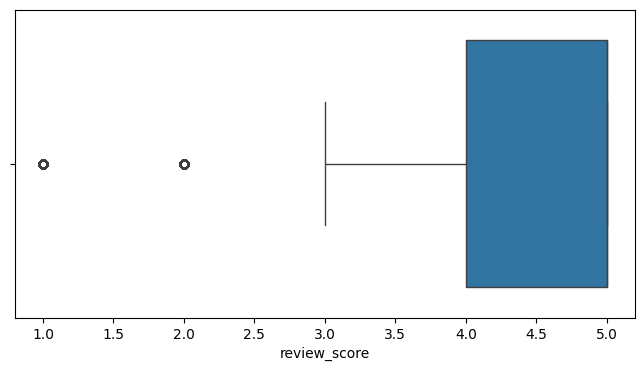

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=order_reviews_df['review_score'])
plt.show()

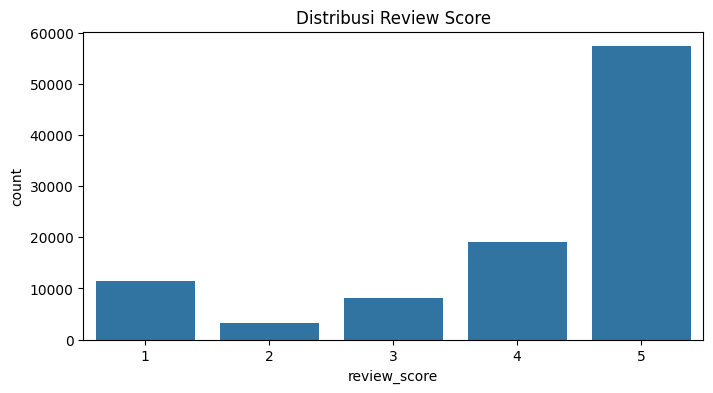

In [ ]:
# cek distribusi review_score

plt.figure(figsize=(8, 4))
sns.countplot(x=order_reviews_df['review_score'])
plt.title('Distribusi Review Score')
plt.show()

## Exploratory Data Analysis (EDA)

### Explore products_df

In [ ]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10075,c224f464aeeb2c6af33f0682a181efa7,utilidades_domesticas,60.0,1809.0,1.0,12600.0,16.0,2.0,11.0
9716,b4275084ccfa0633ab3219949f6a3b9c,automotivo,48.0,283.0,1.0,850.0,30.0,30.0,30.0
20007,c5db51af7d9a58228bcea932010cf080,brinquedos,56.0,859.0,4.0,6000.0,58.0,27.0,33.0
30601,4a545fda8038a360bd93a5f1ac419a4e,esporte_lazer,41.0,767.0,1.0,100.0,18.0,18.0,18.0
11498,80be9ceee6b3290d8a41e98cf7d44454,eletronicos,52.0,1224.0,3.0,233.0,16.0,15.0,9.0


In [ ]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.624237,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4281.980200,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [ ]:
# Cek distribusi kategori produk
category_distribution = products_df['product_category_name'].value_counts().head(10)
print(category_distribution)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64


In [ ]:
# Distribusi jumlah foto produk
photo_distribution = products_df['product_photos_qty'].value_counts().sort_index()
print(photo_distribution)

product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
14.0        5
15.0        8
17.0        7
18.0        2
19.0        1
20.0        1
Name: count, dtype: int64


In [ ]:
# Produk dengan dimensi terbesar dan terkecil
largest_product = products_df.sort_values(by=['product_length_cm', 'product_height_cm', 'product_width_cm'], ascending=False).head(1)
smallest_product = products_df.sort_values(by=['product_length_cm', 'product_height_cm', 'product_width_cm']).head(1)
print("Produk dengan dimensi terbesar:")
print(largest_product)
print("Produk dengan dimensi terkecil:")
print(smallest_product)

Produk dengan dimensi terbesar:
                             product_id product_category_name  \
28536  d7324d4c913e7b424cb61675dafc8c10         esporte_lazer   

       product_name_lenght  product_description_lenght  product_photos_qty  \
28536                 43.0                       347.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
28536           20900.0              105.0               70.0   

       product_width_cm  
28536              25.0  
Produk dengan dimensi terkecil:
                             product_id   product_category_name  \
30345  34d6306314a47fe15c1efdbc23302020  informatica_acessorios   

       product_name_lenght  product_description_lenght  product_photos_qty  \
30345                 38.0                       301.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
30345             107.0                7.0                7.0   

       product_width_cm  
30345           

<Axes: >

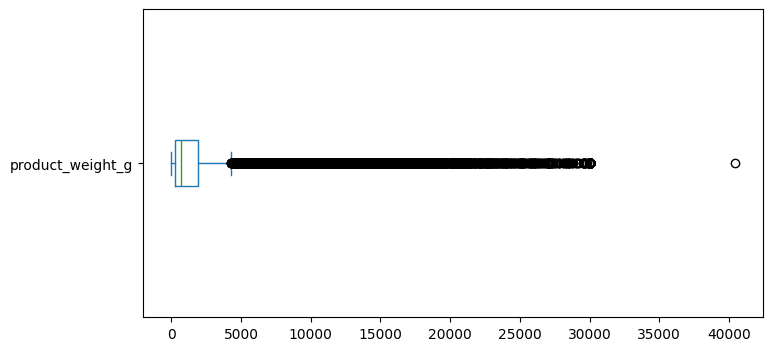

In [ ]:
# distribusi berat produk
products_df['product_weight_g'].plot(kind='box', vert=False, figsize=(8, 4))

In [ ]:
# Panjang deskripsi produk terpendek dan terpanjang
shortest_description = products_df['product_description_lenght'].min()
longest_description = products_df['product_description_lenght'].max()
print(f"Panjang deskripsi terpendek: {shortest_description}")
print(f"Panjang deskripsi terpanjang: {longest_description}")

Panjang deskripsi terpendek: 4.0
Panjang deskripsi terpanjang: 3992.0


### Explore order_payments_df

In [ ]:
# Cek jumlah transaksi per metode pembayaran
order_payments_df['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529


In [ ]:
# Melihat distribusi jumlah pembayaran per transaksi.
order_payments_df['payment_installments'].value_counts()

,count
payment_installments,
1,52545
2,12413
3,10461
4,7098
10,5328
5,5239
8,4268
6,3920
7,1626


In [ ]:
# Cek statistik dasar dari jumlah pembayaran.
order_payments_df['payment_value'].describe()

,payment_value
count,103883.000000
mean,154.104831
std,217.495628
min,0.000000
25%,56.800000
50%,100.000000
75%,171.840000
max,13664.080000


In [ ]:
# Cek transaksi dengan nominal pembayaran tertinggi.
order_payments_df.sort_values(by='payment_value', ascending=False).head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


In [ ]:
# Cek transaksi dengan nominal pembayaran terendah.
order_payments_df.sort_values(by='payment_value', ascending=True).head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0


In [ ]:
# Melihat metode pembayaran paling sering digunakan
order_payments_df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79


In [ ]:
# Rata-rata nilai transaksi per metode pembayaran
order_payments_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,163.319021
boleto,145.034435
debit_card,142.570170
voucher,65.703354


In [ ]:
# Transaksi dengan pembayaran lebih dari sekali (cicilan)
order_payments_df[order_payments_df['payment_installments'] > 1]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
...,...,...,...,...,...
103878,2e3d96522c8c378d4135c12a65c977aa,1,credit_card,4,47.62
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80


### Explore order_reviews_df

In [ ]:
# Cek distribusi skor review. Untuk mengetahui sebaran rating dari pelanggan
order_reviews_df['review_score'].value_counts()

,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


In [ ]:
# Statistik dasar dari review score
order_reviews_df['review_score'].describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
# Review dengan komentar terpendek dan terpanjang
print(order_reviews_df['review_comment_message'].str.len().min())  # Panjang terpendek
print(order_reviews_df['review_comment_message'].str.len().max())  # Panjang terpanjang

order_reviews_df.loc[order_reviews_df['review_comment_message'].str.len().idxmax()]


1
208


,1316
review_id,11eb20303bc6c13c41eeb1496e64aa97
order_id,18c643cade587cd125b3a56377985cac
review_score,1
review_comment_title,No title
review_comment_message,"NÃO RECEBI O PRODUTO, O PRODUTO CONSTA COMO EN..."
review_creation_date,2018-03-18 00:00:00
review_answer_timestamp,2018-03-19 10:32:01


In [ ]:
# Jumlah review dengan atau tanpa komentar
order_reviews_df['review_comment_message'].isna().value_counts()

,count
review_comment_message,
False,99224


In [ ]:
# Cek rata-rata review score untuk setiap produk
average_review_score_per_product = order_reviews_df.groupby('order_id')['review_score'].mean().reset_index()

# Lihat hasilnya
average_review_score_per_product.head()


,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


In [ ]:
# Puncak aktivitas review terjadi
order_reviews_df['review_creation_date'].dt.month.value_counts().sort_index()

,count
review_creation_date,
1,6418
2,7514
3,10284
4,9342
5,11168
6,10155
7,9137
8,13490
9,4199


### Explore products_df & order_payments_df

In [ ]:
# Gabungkan products_df dengan order_items_df
products_orders_df = products_df.merge(order_items_df, on='product_id', how='inner')

# Gabungkan lagi dengan order_payments_df lewat order_id
full_data_df = products_orders_df.merge(order_payments_df, on='order_id', how='inner')

# Cek hasil gabungan
full_data_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,1,debit_card,1,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,1,voucher,1,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,1,credit_card,1,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,1,credit_card,2,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,1,credit_card,4,46.19


In [ ]:
# Produk dengan harga tertinggi
most_expensive_products = full_data_df.sort_values(by='price', ascending=False).head(10)
print(most_expensive_products[['product_id', 'product_category_name', 'price']])

                              product_id  product_category_name    price
21370   489ae2aa008f021502940f251d4cce7f  utilidades_domesticas  6735.00
77181   69c590f7ffc7bf8db97190b6cb6ed62e                    pcs  6729.00
51630   1bdf5e6731585cf01aa8169c7028d6ad                  artes  6499.00
75011   a6492cc69376c469ab6f61d8f44de961        eletroportateis  4799.00
33597   c3ed642d592594bb648ff4a04cee2747        eletroportateis  4690.00
88263   259037a6a41845e455183f89c5035f18                    pcs  4590.00
111125  a1beef8f3992dbd4cd8726796aa69c53  instrumentos_musicais  4399.87
109466  6cdf8fc1d741c76586d8b6b15e9eef30         consoles_games  4099.99
47985   dd113cb02b2af9c8e5787e8f1f0722f6          esporte_lazer  4059.00
41769   6902c1962dd19d540807d0ab8fade5c6     relogios_presentes  3999.90


In [ ]:
# Produk dengan harga terendah
cheapest_products = full_data_df.sort_values(by='price').head(10)
print(cheapest_products[['product_id', 'product_category_name', 'price']])

                             product_id              product_category_name  \
30855  8a3254bee785a526d548a81a9bc3c9be  construcao_ferramentas_construcao   
30856  8a3254bee785a526d548a81a9bc3c9be  construcao_ferramentas_construcao   
30857  8a3254bee785a526d548a81a9bc3c9be  construcao_ferramentas_construcao   
58351  05b515fdc76e888aada3c6d66c201dff                       beleza_saude   
58352  05b515fdc76e888aada3c6d66c201dff                       beleza_saude   
9743   270516a3f41dc035aa87d220228f844c                       beleza_saude   
58353  05b515fdc76e888aada3c6d66c201dff                       beleza_saude   
9745   270516a3f41dc035aa87d220228f844c                       beleza_saude   
9746   270516a3f41dc035aa87d220228f844c                       beleza_saude   
9744   270516a3f41dc035aa87d220228f844c                       beleza_saude   

       price  
30855   0.85  
30856   0.85  
30857   0.85  
58351   1.20  
58352   1.20  
9743    1.20  
58353   1.20  
9745    1.20  
9746  

In [ ]:
# Total penjualan per kategori produk
top_selling_categories = full_data_df.groupby('product_category_name')['order_id'].count().sort_values(ascending=False).head(10)
print(top_selling_categories)

product_category_name
cama_mesa_banho           11823
beleza_saude               9972
esporte_lazer              8945
moveis_decoracao           8744
informatica_acessorios     8082
utilidades_domesticas      7355
relogios_presentes         6201
telefonia                  4721
ferramentas_jardim         4574
automotivo                 4379
Name: order_id, dtype: int64


In [ ]:
# Frekuensi metode pembayaran
payment_methods = full_data_df['payment_type'].value_counts()
print(payment_methods)

payment_type
credit_card    86769
boleto         22867
voucher         6274
debit_card      1691
Name: count, dtype: int64


In [ ]:
# Rata-rata cicilan per metode pembayaran
avg_installments = full_data_df.groupby('payment_type')['payment_installments'].mean().sort_values(ascending=False)
print(avg_installments)

payment_type
credit_card    3.628681
boleto         1.000000
debit_card     1.000000
voucher        1.000000
Name: payment_installments, dtype: float64


## Visualization & Explanatory Analysis

##### *Kategori produk apa yang memiliki jumlah penjualan terbanyak dan terendah?*

In [ ]:
# Merge order_items_df with products_df to get product_category_name
order_items_df = order_items_df.merge(products_df[['product_id', 'product_category_name']], on='product_id', how='left')

In [ ]:
# Hitung jumlah penjualan per kategori produk
product_sales = order_items_df.groupby('product_category_name')['order_id'].count().sort_values(ascending=False)

<ipython-input-94-79345a991ab9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, palette='viridis')


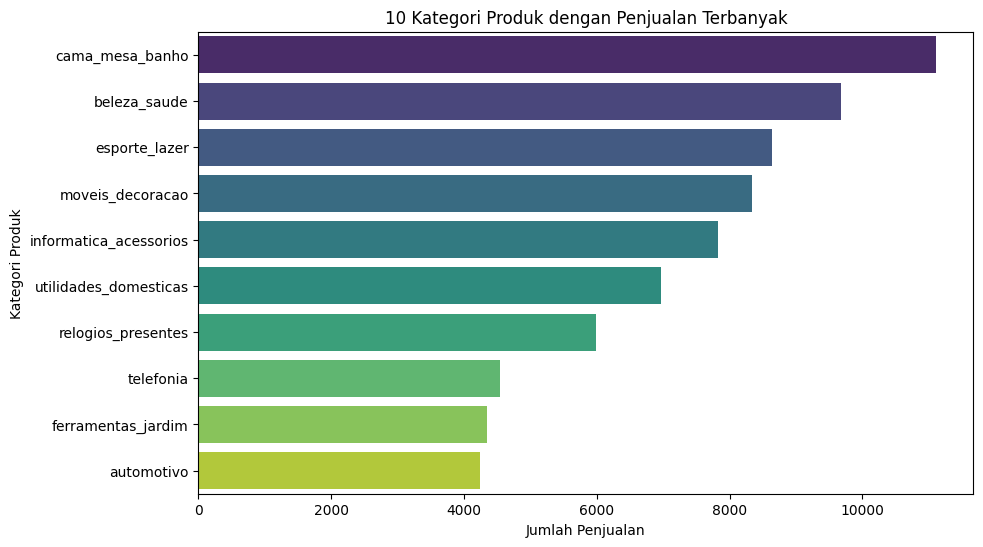

In [ ]:
# Visualisasi 10 kategori dengan penjualan terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.head(10).values, y=product_sales.head(10).index, palette='viridis')
plt.title('10 Kategori Produk dengan Penjualan Terbanyak')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

<ipython-input-95-4dfc6a599b52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.tail(10).values, y=product_sales.tail(10).index, palette='magma')


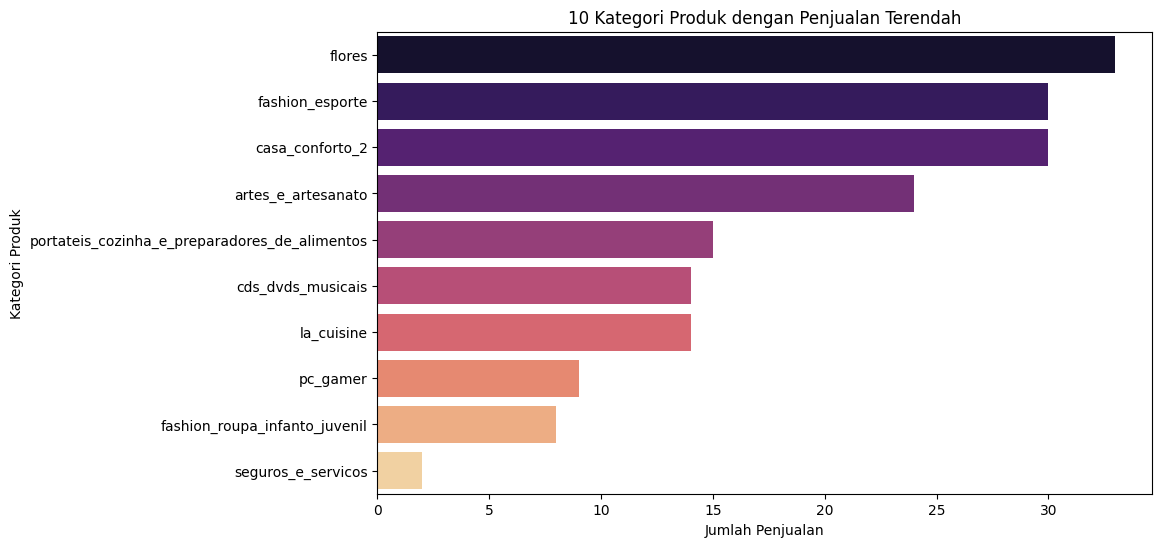

In [ ]:
# Visualisasi 10 kategori dengan penjualan terendah
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.tail(10).values, y=product_sales.tail(10).index, palette='magma')
plt.title('10 Kategori Produk dengan Penjualan Terendah')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

### Insight


*   Ada beberapa kategori produk yang jauh lebih populer dibanding yang lain. Misalnya, kategori seperti **“cama_mesa_banho”** (perlengkapan rumah) punya jumlah penjualan yang jauh lebih tinggi. Ini bisa berarti produk ini sangat dibutuhkan sehari-hari.
*   Sebaliknya, ada kategori dengan penjualan sangat rendah, mungkin karena kurangnya permintaan atau kurang promosi. Kita bisa cek apakah ini masalah harga, ketersediaan, atau faktor lainnya.

*   Jadi, untuk kategori dengan penjualan tinggi, bisa jadi peluang meningkatkan promosi atau bundling produk sejenis. Sementara, kategori dengan penjualan rendah bisa dievaluasi apakah perlu promosi tambahan atau pengurangan stok.





##### *Metode pembayaran apa yang paling sering digunakan dan tidak digunakan oleh pelanggan?*

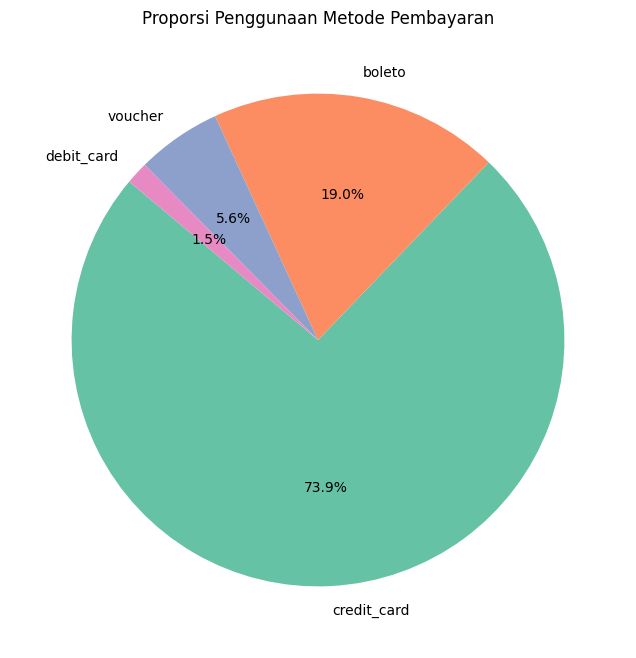

In [ ]:
# Hitung frekuensi penggunaan metode pembayaran
payment_methods = order_payments_df['payment_type'].value_counts()

# Visualisasi metode pembayaran dengan pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Proporsi Penggunaan Metode Pembayaran')
plt.show()

### Insight


*   **Credit card** jelas jadi metode pembayaran favorit pelanggan — mungkin karena kemudahan cicilan dan cashback.
*   Metode pembayaran seperti boleto (semacam pembayaran lewat bank) lebih jarang digunakan. Ini bisa disebabkan karena prosesnya yang lebih lama atau kurang praktis.


*  Jadi, kalau kita ingin meningkatkan metode pembayaran tertentu, bisa kasih promo khusus. Misal, diskon untuk pembayaran dengan metode yang kurang populer, supaya makin banyak yang pakai.





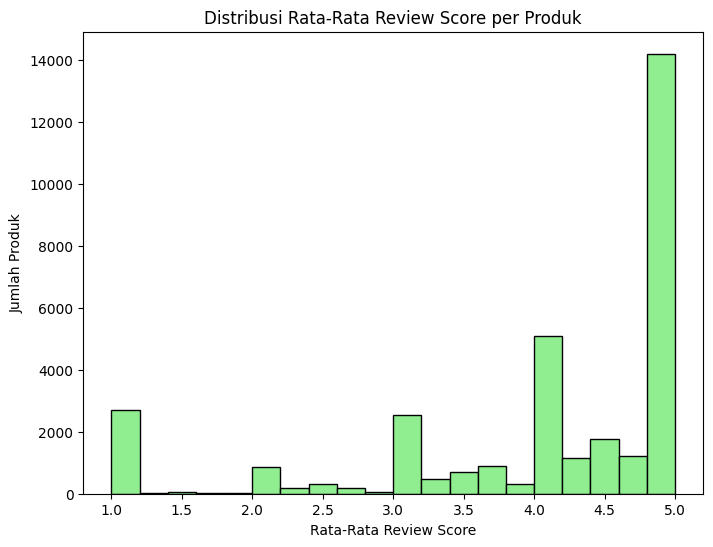

In [ ]:
# Gabungkan order_items_df dengan order_reviews_df untuk mendapatkan product_id
order_reviews_with_product_id = order_reviews_df.merge(order_items_df[['order_id', 'product_id']], on='order_id', how='left')

# Sekarang, Anda dapat menghitung rata-rata review score per product_id
avg_review_per_product = order_reviews_with_product_id.groupby('product_id')['review_score'].mean()

# Lanjutkan dengan visualisasi
plt.figure(figsize=(8, 6))
plt.hist(avg_review_per_product, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi Rata-Rata Review Score per Produk')
plt.xlabel('Rata-Rata Review Score')
plt.ylabel('Jumlah Produk')
plt.show()

### Insight


*   Sebagian besar produk punya review score tinggi (misal 4 atau 5), yang berarti mayoritas pelanggan puas dengan pembelian mereka. Ini menjadi indikasi bahwa kualitas produk secara umum cukup baik.

*   Ada juga produk dengan skor rendah — ini bisa jadi tanda ada masalah, entah dari segi kualitas produk, pengiriman, atau ekspektasi pelanggan yang nggak terpenuhi.
*   Jadi, untuk itu kita bisa kasih perhatian lebih pada produk dengan skor rendah. Mungkin lewat survei tambahan buat tahu masalahnya dan memperbaiki kualitas layanan atau produk tersebut.



### Overall Insight


*   Kita bisa manfaatin kategori produk terlaris dan metode pembayaran favorit buat ngembangin strategi promosi dan kenyamanan transaksi.
*   Produk dengan review score rendah bisa jadi prioritas evaluasi supaya pengalaman pelanggan lebih baik ke depannya.



## Analisis Lanjutan

#### Metode Clustering

1. Manual Grouping: Kita buat grup pelanggan berdasarkan jumlah pembelian:
*   Low Buyer: Pelanggan dengan 1-2 pembelian
*   Mid Buyer: Pelanggan dengan 3-5 pembelian

*   High Buyer: Pelanggan dengan lebih dari 5 pembelian




In [ ]:
# Hitung jumlah pembelian per pelanggan
orders_df = pd.read_csv("https://raw.githubusercontent.com/Evameivina/mydataset/refs/heads/main/olist_orders_dataset.csv")

orders_per_customer = orders_df.groupby('customer_id')['order_id'].nunique().reset_index()
orders_per_customer.columns = ['customer_id', 'total_orders']

In [ ]:
# Manual grouping berdasarkan jumlah pembelian
def categorize_buyer(orders):
    if orders <= 2:
        return 'Low Buyer'
    elif orders <= 5:
        return 'Mid Buyer'
    else:
        return 'High Buyer'

In [ ]:
# Terapkan fungsi grouping
orders_per_customer['buyer_group'] = orders_per_customer['total_orders'].apply(categorize_buyer)

In [ ]:
# Lihat hasil grouping
orders_per_customer.head()

,customer_id,total_orders,buyer_group
0,00012a2ce6f8dcda20d059ce98491703,1,Low Buyer
1,000161a058600d5901f007fab4c27140,1,Low Buyer
2,0001fd6190edaaf884bcaf3d49edf079,1,Low Buyer
3,0002414f95344307404f0ace7a26f1d5,1,Low Buyer
4,000379cdec625522490c315e70c7a9fb,1,Low Buyer


#### Binning: Kita bagi pelanggan berdasarkan total pengeluaran (payment_value) mereka.

*   Low Spender: 0 - 100 BRL
*   Mid Spender: 100 - 500 BRL

*   High Spender: > 500 BRL





In [ ]:
# Gabungkan orders_df dengan payments_df
orders_payments_df = orders_df.merge(order_payments_df, on='order_id', how='inner')

In [ ]:
# Total pengeluaran per pelanggan
spending_per_customer = orders_payments_df.groupby('customer_id')['payment_value'].sum().reset_index()

In [ ]:
# Binning pengeluaran
bins = [0, 100, 500, spending_per_customer['payment_value'].max()]
labels = ['Low Spender', 'Mid Spender', 'High Spender']

spending_per_customer['spending_group'] = pd.cut(spending_per_customer['payment_value'], bins=bins, labels=labels)

In [ ]:
# Lihat hasil binning
spending_per_customer.head()

,customer_id,payment_value,spending_group
0,00012a2ce6f8dcda20d059ce98491703,114.74,Mid Spender
1,000161a058600d5901f007fab4c27140,67.41,Low Spender
2,0001fd6190edaaf884bcaf3d49edf079,195.42,Mid Spender
3,0002414f95344307404f0ace7a26f1d5,179.35,Mid Spender
4,000379cdec625522490c315e70c7a9fb,107.01,Mid Spender


## Conclusion

## Kesimpulan

#### Kategori Produk

1.  Produk "cama_mesa_banho" paling banyak terjual, menunjukkan minat tinggi pada produk rumah tangga. Sebaliknya, kategori dengan penjualan terendah mungkin perlu dievaluasi strategi pemasarannya.

#### Metode Pembayaran
2.   Credit card jadi metode pembayaran paling favorit, sementara metode seperti boleto jarang digunakan — mungkin karena kurang praktis.

#### Review Score
*   Sebagian besar produk mendapat review tinggi (4-5), menandakan kepuasan pelanggan cukup baik. Tapi, ada juga produk dengan skor rendah yang perlu diperhatikan lebih lanjut.





In [ ]:
# Dengan asumsi 'full_data_df' berisi data yang ingin Anda simpan:
full_data_df.to_csv("all_data.csv", index=False)